# Notebook: Análise Exploratória e Pré-processamento dos Dados

## Introdução

Este notebook faz parte do projeto do Nanodegree 2025/1 da disciplina de Machine Learning & Inteligência Artificial.
Seu objetivo é explorar e preparar os dados para a tarefa de previsão de evasão de estudantes em um curso online síncrono promovido pela PensComp.

---

In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode

### Carregamento dos Dados

O dataset original é carregado a partir de um arquivo CSV contendo informações dos usuários. Este arquivo servirá como base para a análise exploratória e limpeza inicial dos dados.

In [ ]:
df = pd.read_csv('dados_projeto_evasao_treino - Copia.csv')

### Entendimento Inicial

In [ ]:
# Estrutura do DF
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [ ]:
# Amostra dos dados
df.head()

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,1,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
1,3,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2,4,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
3,5,NaN,1692744534,1693928454,20,6,0,4,0,0,...,0,1.0,NaN,NaN,1,62,1.0,0,NaN,NaN
4,6,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [ ]:
# Classificação das colunas por tipo de prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("\nColunas categóricas:", categoricas)
print("Colunas temporais:", temporais)
print("Colunas numéricas (contagem - nr_):", numericas_nr)
print("Colunas numéricas (valores/escalares - vl_):", numericas_vl)


Colunas categóricas: ['ds_cidade_usuario']
Colunas temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Colunas numéricas (contagem - nr_): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Colunas numéricas (valores/escalares - vl_): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'vl_m

### Verificação de itens ausentes

In [ ]:
# Verificando colunas que possuam ao menos um item nulo
missing = (df.isnull().mean() * 100).sort_values(ascending=True)

print("\nProporção de valores ausentes por coluna (%):")
print(missing[missing > 0].round(2))


Proporção de valores ausentes por coluna (%):
ds_cidade_usuario                       13.50
vl_medio_atividade_diaria               47.75
nr_intervalos_uso                       47.75
vl_desempenho_usuario                   71.75
vl_media_notas                          71.75
vl_medio_tempo_questionario             72.25
vl_medio_tempo_questionario_avaliado    73.25
vl_engajamento_notas                    84.75
vl_media_questoes_por_dia               84.75
vl_engajamento_usuario_por_intervalo    92.75
vl_engajamento_usuario_intradia         92.75
vl_desempenho_questionario              93.25
vl_submissoes_por_dias_ativos           98.00
vl_media_submissoes_codigo              99.00
dtype: float64


Primeiro vamos remover a coluna que representaria o ID para não influenciar na predição e após isso remover todas as linhas onde na coluna ts_primeiro_acesso esteja zerado "0", pois isso simboliza que o aluno nunca acessou o portal

In [ ]:
df = df.drop("Unnamed: 0", axis=1)


In [ ]:
df = df[df['ts_primeiro_acesso'] != 0]

In [ ]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,1692744534,1693928454,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,1689612221,1693937636,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,1692821395,1692905369,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,1693359554,1693359711,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,1693187526,1693187600,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


Agora fizemos a conversao dos dados TS para um datetime

In [ ]:
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s')

In [ ]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,2023-08-22 22:48:54,2023-09-05 15:40:54,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,2023-07-17 16:43:41,2023-09-05 18:13:56,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,2023-08-23 20:09:55,2023-08-24 19:29:29,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,2023-08-30 01:39:14,2023-08-30 01:41:51,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,2023-08-28 01:52:06,2023-08-28 01:53:20,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


limpeza e formatação coluna cidade usuario

In [ ]:
print(df['ds_cidade_usuario'].unique())

[nan 'Campinas' 'São Paulo' 'curitiba' 'Uru' 'Curitiba' 'Blumenau '
 'brasilia' 'Holambra' 'campinas' 'sao paulo']


In [ ]:
df['ds_cidade_usuario'] = (
    df['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)

In [ ]:
df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

<ipython-input-15-3223286759>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [ ]:
print(df['ds_cidade_usuario'].unique())

['CIDADE NAO INFORMADA' 'CAMPINAS' 'SAO PAULO' 'CURITIBA' 'URU' 'BLUMENAU'
 'BRASILIA' 'HOLAMBRA']


### Tratamento de Valores Ausentes

Durante a análise, identificamos 5 colunas com altos índices de valores nulos:

- `vl_media_submissoes_codigo` (~99%)
- `vl_submissoes_por_dias_ativos` (~98%)
- `vl_desempenho_questionario` (~93%)
- `vl_engajamento_usuario_por_intervalo` (~92.75%)
- `vl_engajamento_usuario_intradia` (~92.75%)

#### Colunas removidas
As duas primeiras foram removidas por conterem dados ausentes em quase todos os registros, o que inviabiliza sua utilização estatística ou em modelos preditivos.

#### Colunas preenchidas com zero
As demais colunas foram mantidas e os valores nulos preenchidos com **zero**, assumindo que a ausência dos dados representa **falta de atividade do usuário** (ex: nenhum questionário feito, nenhum engajamento detectado). Isso mantém a coerência da análise com o objetivo de detectar evasão por inatividade.


In [ ]:
# Remover colunas com mais de 70% de valores ausentes
df.drop(columns=["vl_media_submissoes_codigo", "vl_submissoes_por_dias_ativos"], inplace=True)
df.drop(columns=["vl_media_questoes_por_dia", "vl_engajamento_notas"], inplace=True)

In [ ]:
# Preencher a coluna de desempenho com zero
df["vl_desempenho_questionario"] = df["vl_desempenho_questionario"].fillna(0)
df["vl_engajamento_usuario_por_intervalo"] = df["vl_engajamento_usuario_por_intervalo"].fillna(0)
df["vl_engajamento_usuario_intradia"] = df["vl_engajamento_usuario_intradia"].fillna(0)
df["vl_desempenho_usuario"] = df["vl_desempenho_usuario"].fillna(0)
df["vl_media_notas"] = df["vl_media_notas"].fillna(0)

### Por que utilizamos a mediana para preencher valores ausentes?

Ao lidar com variáveis contínuas como tempo médio de questionário (`vl_medio_tempo_questionario`) e tempo médio em questionários avaliados (`vl_medio_tempo_questionario_avaliado`), optamos por preencher os valores ausentes com a **mediana**.

A **mediana** é o valor central de uma distribuição ordenada — ou seja, separa os 50% menores dos 50% maiores valores. Diferente da **média**, a mediana **não é afetada por outliers ou valores extremos**, o que a torna mais robusta para representar o "comportamento típico" dos dados, especialmente em distribuições assimétricas ou com grande variação.

#### Vantagens de usar a mediana:
- Evita distorção causada por tempos muito longos ou muito curtos.
- Mantém a coerência estatística da variável.
- Preserva o padrão geral da distribuição sem inflar ou achatar artificialmente os dados.

Dessa forma, preenchemos os dados faltantes sem comprometer a qualidade da análise ou da modelagem futura.


In [ ]:
#Preencher com mediana (tempo médio tem sentido contínuo e comparável):
df["vl_medio_tempo_questionario"] = df["vl_medio_tempo_questionario"].fillna(df["vl_medio_tempo_questionario"].median())
df["vl_medio_tempo_questionario_avaliado"] = df["vl_medio_tempo_questionario_avaliado"].fillna(df["vl_medio_tempo_questionario_avaliado"].median())

In [ ]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_respondidas,nr_questoes_corretas,nr_questoes_erradas,nr_questoes_parciais,vl_desempenho_usuario,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,perfil
3,CIDADE NAO INFORMADA,2023-08-22 22:48:54,2023-09-05 15:40:54,20,6,0,4,0,0,1,...,44,1,0,0,1.000000,1,62,1.000000,0,Estável
5,CIDADE NAO INFORMADA,2023-07-17 16:43:41,2023-09-05 18:13:56,56,6,0,0,0,0,4,...,62,51,8,1,0.991837,21,42,0.990476,47,Estável
7,CAMPINAS,2023-08-23 20:09:55,2023-08-24 19:29:29,19,18,0,0,0,0,0,...,0,0,0,0,0.000000,0,0,0.000000,0,Apoio Pedagógico
8,CAMPINAS,2023-08-30 01:39:14,2023-08-30 01:41:51,13,13,0,0,0,0,0,...,0,0,0,0,0.000000,0,0,0.000000,0,Apoio Pedagógico
9,CIDADE NAO INFORMADA,2023-08-28 01:52:06,2023-08-28 01:53:20,15,15,0,0,0,0,0,...,0,0,0,0,0.000000,0,0,0.000000,0,Apoio Pedagógico


In [ ]:
df.to_csv("dados_convertidos.csv", index=False)


### Análise de Engajamento por Cidade

Comparamos a média de interações dos alunos por cidade, permitindo identificar regiões com maior ou menor participação.

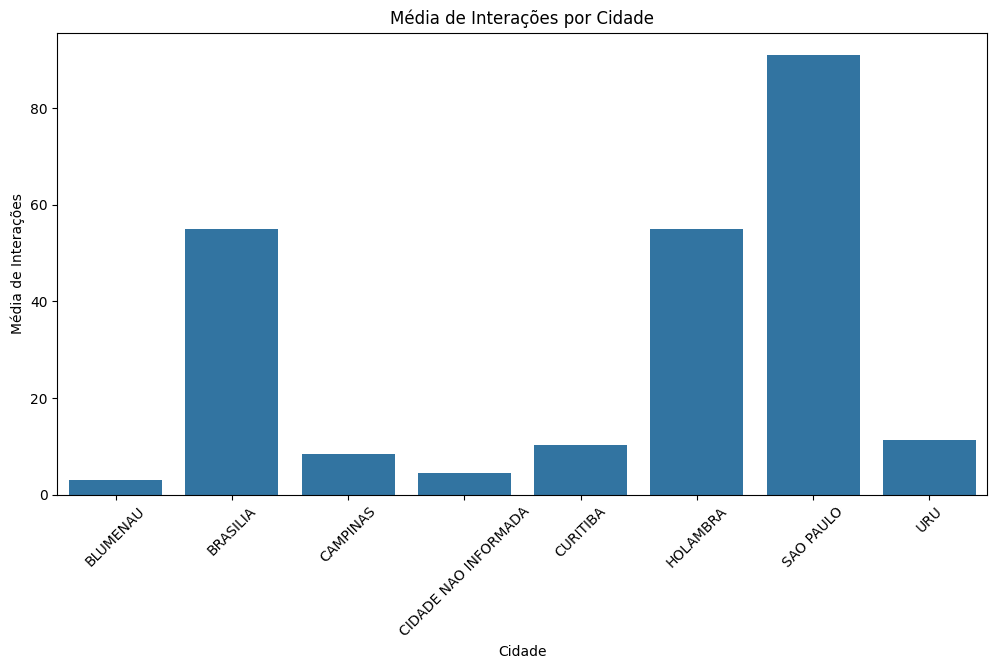

In [ ]:
# Média de engajamento por cidade
city_stats = df.groupby('ds_cidade_usuario')[['nr_interacoes_usuario',
                                              'vl_desempenho_usuario',
                                              'nr_questionarios_finalizados']].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=city_stats, x='ds_cidade_usuario', y='nr_interacoes_usuario')
plt.xticks(rotation=45)
plt.title('Média de Interações por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média de Interações')
plt.show()

### Distribuição do Desempenho Geral dos Alunos

O gráfico de desempenho mostra como os alunos estão performando academicamente, com base na métrica `vl_desempenho_usuario`, que varia de 0 a 1. Indicando uma concentração de alunos com ótimo desempenho e muitos com nenhum

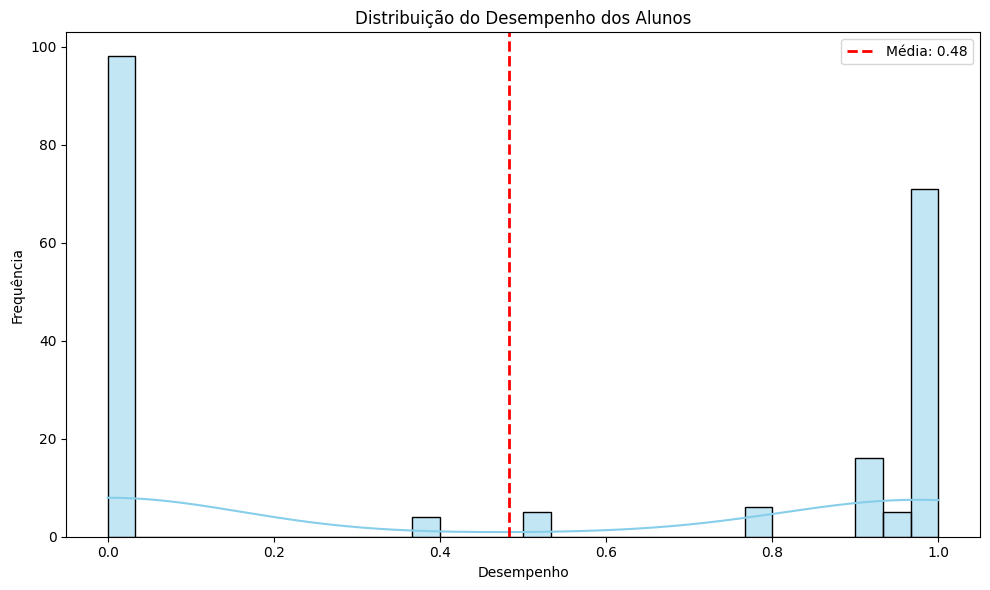

In [ ]:
df['vl_desempenho_usuario'] = pd.to_numeric(df['vl_desempenho_usuario'], errors='coerce')
media_geral = df['vl_desempenho_usuario'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, color='skyblue')
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f'Média: {media_geral:.2f}')
plt.title('Distribuição do Desempenho dos Alunos')
plt.xlabel('Desempenho')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()


### Distribuição dos Dias Desde o Último Acesso

Esse gráfico analisa o comportamento de uso da plataforma, mostrando há quantos dias cada usuário realizou seu último acesso.

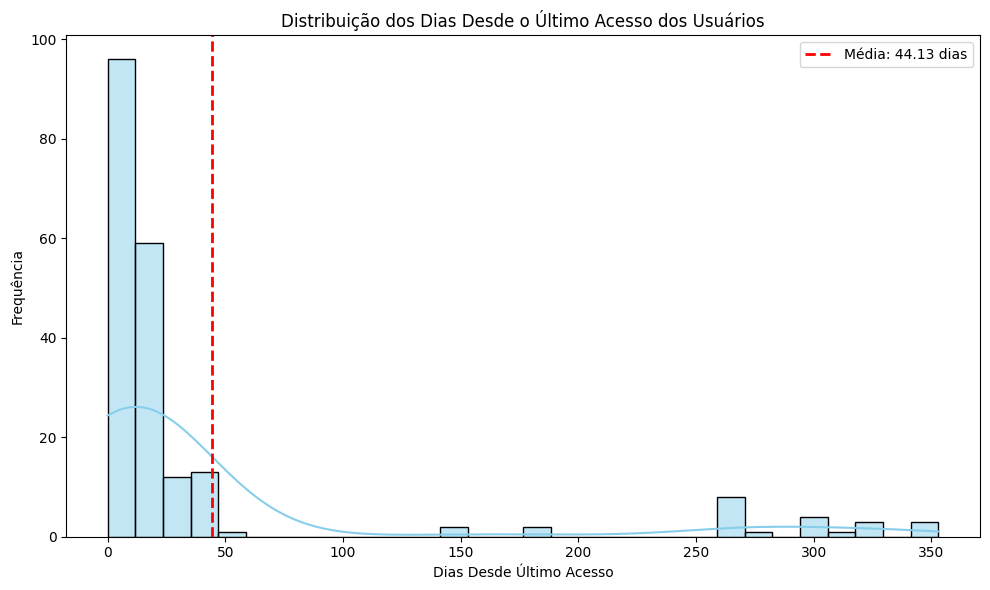

In [ ]:

# Selecionar  a coluna de dias desde o último acesso
dias = df['nr_dias_desde_ultimo_acesso']

# Calcular a média
media_dias = dias.mean()

# Plotar histograma com KDE (curva de densidade)
plt.figure(figsize=(10, 6))
sns.histplot(dias, bins=30, kde=True, color='skyblue')

# Adicionar linha da média
plt.axvline(media_dias, color='red', linestyle='--', linewidth=2, label=f'Média: {media_dias:.2f} dias')

# Títulos e eixos
plt.title("Distribuição dos Dias Desde o Último Acesso dos Usuários")
plt.xlabel("Dias Desde Último Acesso")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Com base nessas análises sobre engajamento e desempenho dos alunos, criaremos uma variável chamada `evadiu`.  
Essa variável simula o comportamento de evasão, permitindo que possamos identificar alunos com maior risco de abandono do curso.

#### Criação da variável `evadiu`

Criamos uma nova coluna `evadiu` para simular o comportamento de evasão, utilizando a seguinte lógica:

> Se o aluno **nunca obteve desempenho** (`vl_desempenho_usuario = 0`) e está **há mais de 60 dias sem acessar a plataforma**, consideramos que ele evadiu.

Essa coluna é binária:
- `1` → aluno evadiu
- `0` → aluno ativo ou ainda engajado


In [ ]:
# Criar coluna 'evadiu': alunos com desempenho 0 e sem acessar há mais de 60 dias
df["vl_desempenho_usuario"] = pd.to_numeric(df["vl_desempenho_usuario"], errors="coerce")
df["evadiu"] = ((df["vl_desempenho_usuario"] == 0) & (df["nr_dias_desde_ultimo_acesso"] > 60)).astype(int)


#### Comparação entre evasores e não evasores

Com a variável `evadiu` criada, comparamos os dois grupos em relação a:
- Número de interações
- Questionários finalizados
- Submissões de código
- Desempenho geral

Isso nos ajuda a entender quais comportamentos estão mais associados à evasão.

In [ ]:
# Comparar médias de variáveis entre evasores e não evasores
media_por_grupo = df.groupby("evadiu")[
    ["nr_interacoes_usuario", "nr_questionarios_finalizados", "vl_desempenho_usuario", "nr_submissoes_codigo"]
].mean().round(2)

media_por_grupo


,nr_interacoes_usuario,nr_questionarios_finalizados,vl_desempenho_usuario,nr_submissoes_codigo
evadiu,,,,
0,10.3,2.86,0.52,1.12
1,11.0,2.29,0.00,0.00


#### Classificação de Perfis de Risco

A partir das variáveis `vl_desempenho_usuario` e `nr_dias_desde_ultimo_acesso`, classificamos cada aluno em um dos seguintes perfis:

| Perfil            | Critério                                              |
|-------------------|-------------------------------------------------------|
| Alto Risco        | Desempenho = 0 e sem acesso há mais de 60 dias        |
| Reengajamento     | Bom desempenho, mas inativo há mais de 60 dias        |
| Apoio Pedagógico  | Acessa, mas desempenho muito baixo                    |
| Estável           | Acessa com frequência e tem bom desempenho            |


In [ ]:
# Classificar alunos em perfis com base em desempenho e atividade
def perfil(row):
    if row["vl_desempenho_usuario"] == 0 and row["nr_dias_desde_ultimo_acesso"] > 60:
        return "Alto Risco"
    elif row["vl_desempenho_usuario"] > 0.7 and row["nr_dias_desde_ultimo_acesso"] > 60:
        return "Reengajamento"
    elif row["vl_desempenho_usuario"] < 0.3:
        return "Apoio Pedagógico"
    else:
        return "Estável"

df["perfil"] = df.apply(perfil, axis=1)


#### Contagem de Perfis

Finalizamos com a contagem de alunos em cada perfil. Isso nos ajuda a:

- Visualizar a distribuição de risco na base de dados
- Compreender o tamanho de cada grupo e onde priorizar intervenções

Essa segmentação é essencial tanto para análise quanto para futuras estratégias de reengajamento ou previsão automatizada da evasão.

In [ ]:
# Contar a quantidade de alunos em cada perfil
df["perfil"].value_counts().reset_index().rename(columns={"index": "perfil", "perfil": "quantidade"})


,quantidade,count
0,Estável,93
1,Apoio Pedagógico,88
2,Alto Risco,19
3,Reengajamento,5


### Pré-Processamento dos Dados para Modelagem

**Seleção de Atributos**: removemos variáveis que não serão usadas como entrada no modelo, como:
   - `evadiu` (alvo da predição)
   - `perfil` (já é um agrupamento explicativo derivado das features)
   - `ds_cidade_usuario` (categórica não transformada)

In [ ]:
y = df["evadiu"]

In [ ]:
X = df.drop(columns=["evadiu", "perfil", "ds_cidade_usuario"], errors="ignore")

**Exclusão de colunas do tipo `datetime64`:**
   - Modelos de ML não entendem datas diretamente.
   - Em vez disso, já transformamos essas colunas em atributos úteis como `nr_dias_desde_ultimo_acesso`.

In [ ]:
X = X.select_dtypes(exclude=["datetime64[ns]"])

**Escalonamento de Variáveis Numéricas**: usamos `MinMaxScaler` para normalizar todas as variáveis entre 0 e 1. Isso é especialmente importante para algoritmos como redes neurais, que são sensíveis à escala dos dados.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

**Separação dos Conjuntos de Treino e Teste**: dividimos os dados em 80% para treino e 20% para teste, garantindo que a proporção de evasores e não evasores seja mantida (com `stratify`).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

**Verificação de Balanceamento**: imprimimos a distribuição das classes (evadiu = 0 ou 1) no conjunto de treino, o que ajuda a identificar se técnicas adicionais de balanceamento serão necessárias no modelo.

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Distribuição de 'evadiu' no treino:", dict(zip(unique, counts)))

Distribuição de 'evadiu' no treino: {np.int64(0): np.int64(153), np.int64(1): np.int64(11)}
